In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from visualizationtools import visulize_array, visulize_multiplication 

The examples are inspired by the official [NumPy documentation](https://docs.scipy.org/doc/numpy-1.13.0/index.html) and the [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/#python-lists) from [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/).

## Creating arrays and matrices

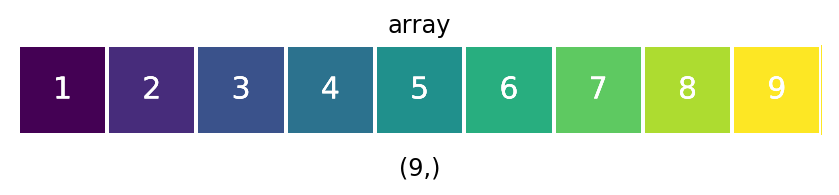

In [2]:
# 1d array
array = np.array([1,2,3,4,5,6,7,8,9])
visulize_array(array, 'array')

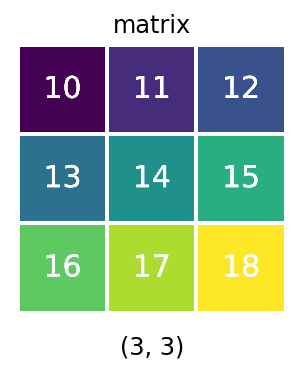

In [3]:
# 2d array aka. a matrix
matrix = np.array([[10,11,12],[13,14,15], [16,17,18]])
visulize_array(matrix, 'matrix')

## Basic operations
### Find min and max values

In [4]:
array = np.array([1,2,3,4,5,6,7,8,9])
matrix = np.array([[10,11,12],[13,14,15], [16,17,18]])

min_array_val = np.min(array)
max_array_val = np.max(array)
min_matrix_val = np.min(matrix)
max_matrix_val = np.max(matrix)
print(f'min_array_val: {min_array_val}')
print(f'max_array_val: {max_array_val}')
print(f'min_matrix_val: {min_matrix_val}')
print(f'max_matrix_val: {max_matrix_val}')

min_array_val: 1
max_array_val: 9
min_matrix_val: 10
max_matrix_val: 18


## Matrix multiplication

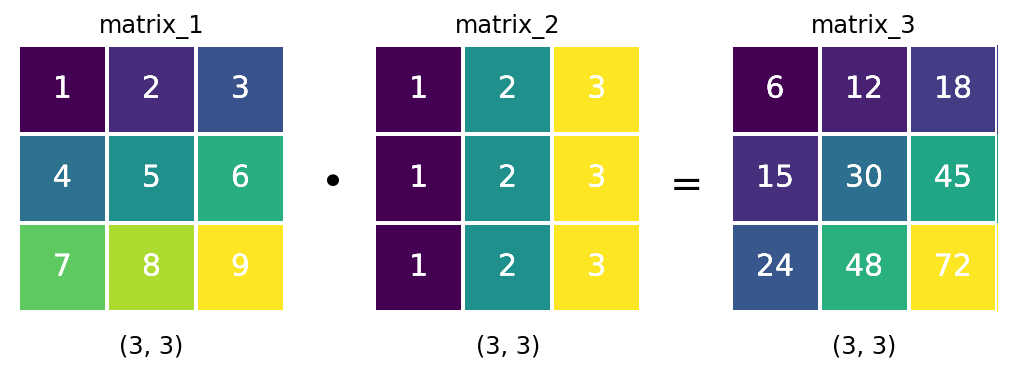

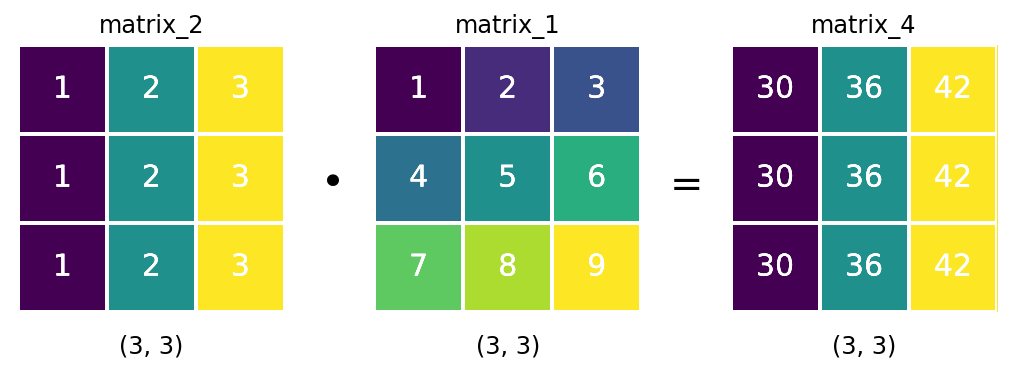

In [5]:
matrix_1 = np.array([[1,2,3],[4,5,6], [7,8,9]])
matrix_2 = np.array([[1,2,3],[1,2,3], [1,2,3]])
matrix_3 = np.dot(matrix_1,matrix_2)
matrix_4 = np.dot(matrix_2,matrix_1)
matrices_1 = [matrix_1, matrix_2, matrix_3]
names_1 = ['matrix_1', 'matrix_2', 'matrix_3']
matrices_2 = [matrix_2, matrix_1, matrix_4]
names_2 = ['matrix_2', 'matrix_1', 'matrix_4']

visulize_multiplication(matrices_1, names_1)
visulize_multiplication(matrices_2, names_2)

(2, 3)


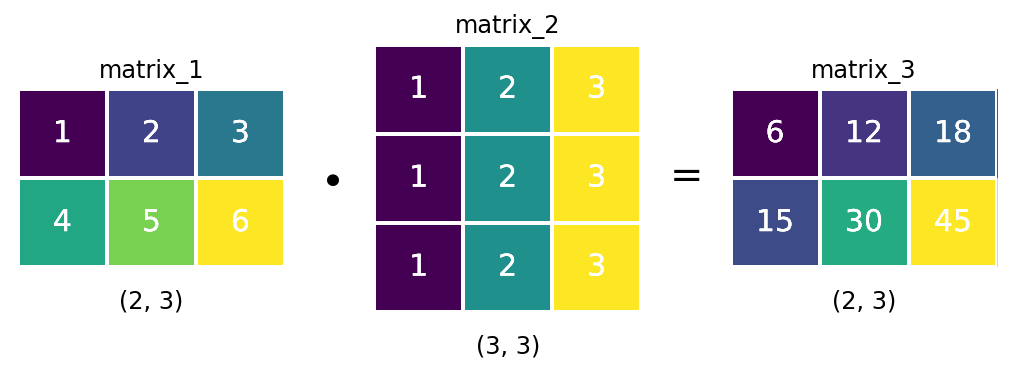

In [6]:
matrix_1 = np.array([[1,2,3],[4,5,6]])
print(matrix_1.shape)
matrix_2 = np.array([[1,2,3],[1,2,3], [1,2,3]])
matrix_3 = np.dot(matrix_1,matrix_2)
matrices_1 = [matrix_1, matrix_2, matrix_3]
names_1 = ['matrix_1', 'matrix_2', 'matrix_3']

visulize_multiplication(matrices_1, names_1)

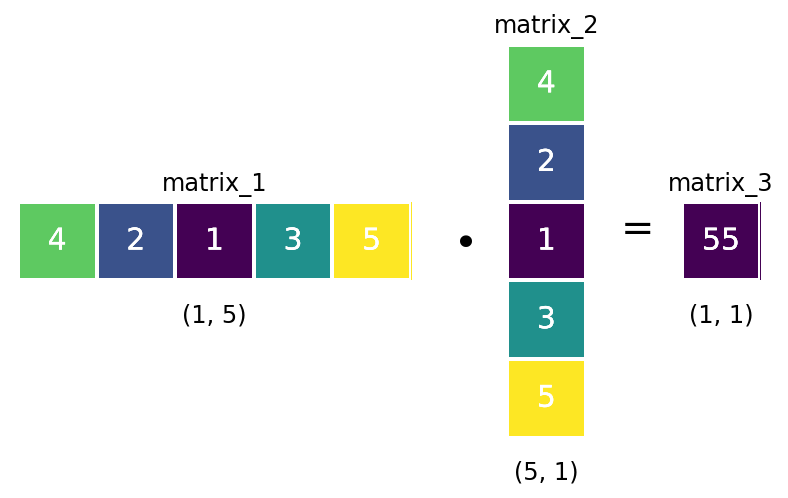

In [7]:
matrix_1 = np.array([[4,2,1,3,5]])
matrix_2 = np.array([[4],[2], [1], [3], [5]])
matrix_3 = np.dot(matrix_1,matrix_2)
matrices_1 = [matrix_1, matrix_2, matrix_3]
names_1 = ['matrix_1', 'matrix_2', 'matrix_3']

visulize_multiplication(matrices_1, names_1)

# Slicing and Indexing
Read about all about slicing and indexing [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html). 
### Example 1:
The basic slice syntax is `i:j:k` where <i>i</i> is the statring index, <i>j</i> is the stopping index, and <i>k</i> is the step. 

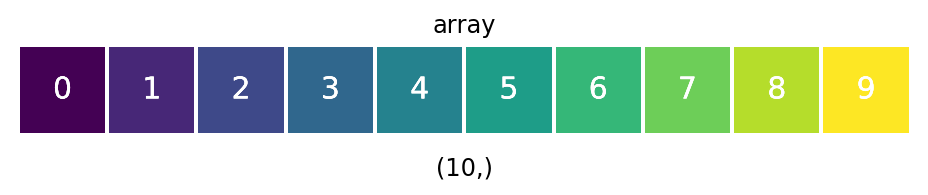

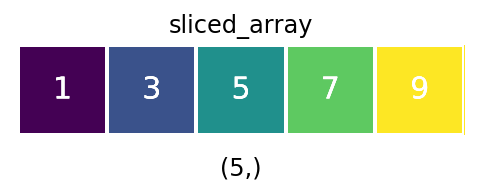

In [8]:

x = np.array([0,1,2,3,4,5,6,7,8,9])
visulize_array(x, 'array')
start_index = 1
stop_index = 10
step = 2
sliced_array = x[start_index:stop_index:step]
visulize_array(sliced_array, 'sliced_array')

### Example 2: 
Negative <i>i</i> and <i>j</i> are interpreted as <i>n</i> + <i>i</i> and <i>n</i> + <i>j</i> elements in the corresponding dimension. Negtaive <i>k</i> takes steps toward smaller indices. Example: <i>n</i> = 10, <i>i=-4</i> is interpreted as 10-4 = 6.

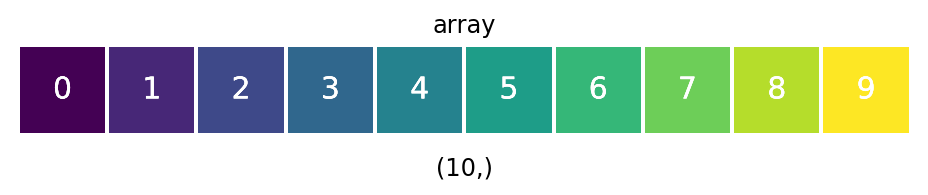

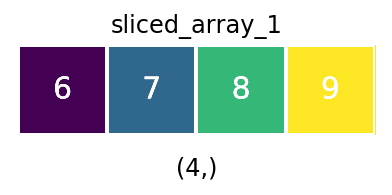

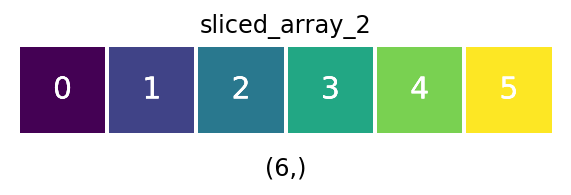

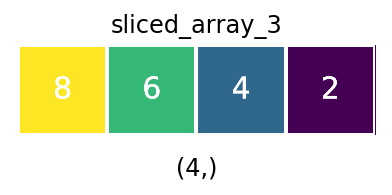

In [9]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
visulize_array(x, 'array')
sliced_array_1 = x[-4:10]
sliced_array_2 = x[0:-4]
sliced_array_3 = x[-2:1:-2] # [10-2:1:-2] = [8:1:-2]
visulize_array(sliced_array_1, 'sliced_array_1')
visulize_array(sliced_array_2, 'sliced_array_2')
visulize_array(sliced_array_3, 'sliced_array_3')

### Example 3
Different slice operations on a 1d numpy array.

x dimmension: 1


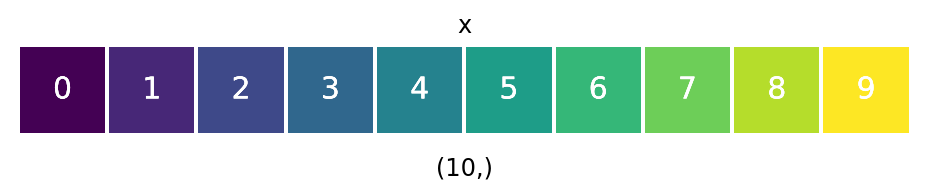

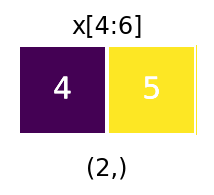

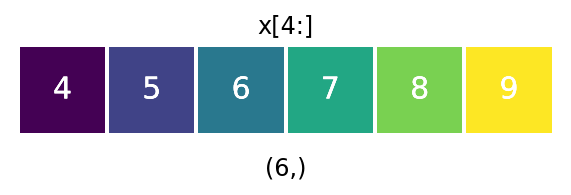

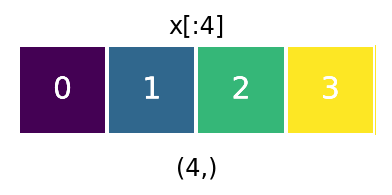

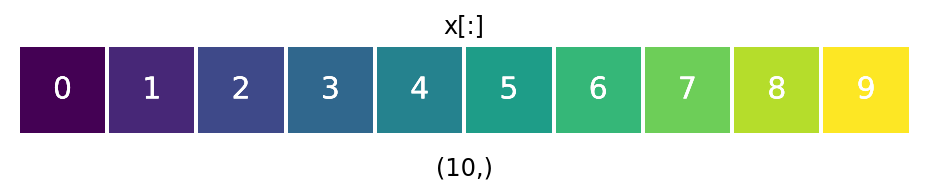

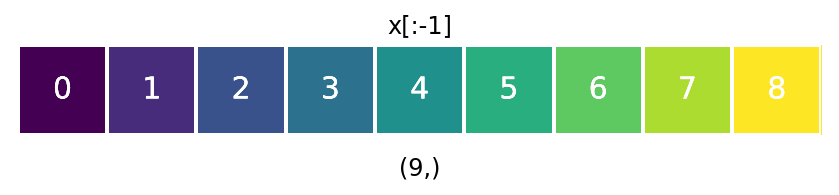

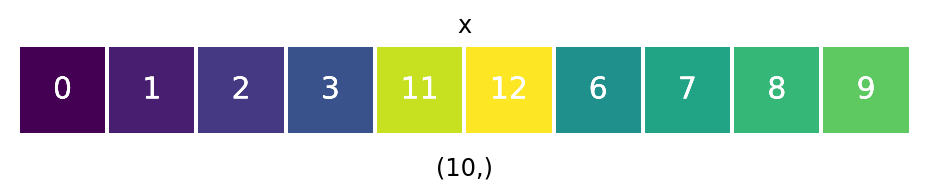

In [10]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
print(f'x dimmension: {x.ndim}')

visulize_array(x, 'x')
visulize_array(x[4:6], 'x[4:6]')
visulize_array(x[4:], 'x[4:]')
visulize_array(x[:4], 'x[:4]')
visulize_array(x[:], 'x[:]')
visulize_array(x[:-1], 'x[:-1]')
x[4:6] = [11,12]

## Row and Column slicing
When the arrays are multideimensinal, you must specify a slice for each dimension of the array. You can also mix integer indexing with slice indexing, but doing so will yield an array of lower dimmension than the original array. The array dimensions can be found with `x.ndim`.

x dimmension: 2


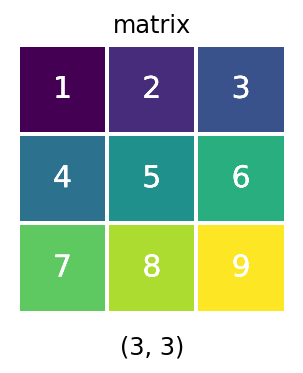

Integer and slice indexing


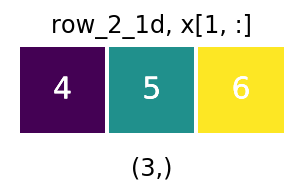

Slice indexing


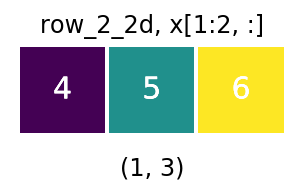

Integer and slice indexing


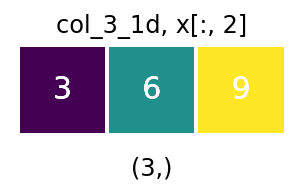

Slice indexing


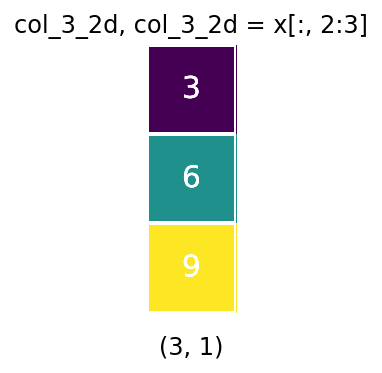

Integer and slice indexing
row_1_1d: [1 2 3], shape: (3,), dim: 1
row_2_1d: [4 5 6], shape: (3,), dim: 1
row_3_1d: [7 8 9], shape: (3,), dim: 1

Slice indexing
row_1_2d: [[1 2 3]], shape: (1, 3), dim: 2
row_2_2d: [[4 5 6]], shape: (1, 3), dim: 2
row_3_2d: [[7 8 9]], shape: (1, 3), dim: 2

Integer and slice indexing
col_1_1d: [1 4 7], shape: (3,), dim: 1
col_2_1d: [2 5 8], shape: (3,), dim: 1
col_3_1d: [3 6 9], shape: (3,), dim: 1

Slice indexing
col_1_r2:
 [[1]
 [4]
 [7]], shape: (3, 1), dim: 2
col_2_r2:
 [[2]
 [5]
 [8]], shape: (3, 1), dim: 2
col_3_r2:
 [[3]
 [6]
 [9]], shape: (3, 1), dim: 2


In [21]:
from pprint import pprint

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(f'x dimmension: {matrix.ndim}')

# integer and slice indexing
row_1_1d = x[0, :]
row_2_1d = x[1, :] 
row_3_1d = x[2, :]

# slice indexing
row_1_2d = x[0:1, :]
row_2_2d = x[1:2, :] 
row_3_2d = x[2:3, :]

# integer and slice indexing
col_1_1d = x[:, 0]
col_2_1d = x[:, 1]
col_3_1d = x[:, 2]

# slice indexing
col_1_2d = x[:, 0:1]
col_2_2d = x[:, 1:2]
col_3_2d = x[:, 2:3]

visulize_array(x, 'matrix')
print('Integer and slice indexing')
visulize_array(row_2_1d, 'row_2_1d, x[1, :]')
print('Slice indexing')
visulize_array(row_2_2d, 'row_2_2d, x[1:2, :]')
print('Integer and slice indexing')
visulize_array(col_3_1d, 'col_3_1d, x[:, 2]')
print('Slice indexing')
visulize_array(col_3_2d, 'col_3_2d, col_3_2d = x[:, 2:3]')

print('Integer and slice indexing')
print(f'row_1_1d: {row_1_1d}, shape: {row_1_1d.shape}, dim: {row_1_1d.ndim}')
print(f'row_2_1d: {row_2_1d}, shape: {row_2_1d.shape}, dim: {row_2_1d.ndim}')
print(f'row_3_1d: {row_3_1d}, shape: {row_3_1d.shape}, dim: {row_3_1d.ndim}')

print('\nSlice indexing')
print(f'row_1_2d: {row_1_2d}, shape: {row_1_2d.shape}, dim: {row_1_2d.ndim}')
print(f'row_2_2d: {row_2_2d}, shape: {row_2_2d.shape}, dim: {row_2_2d.ndim}')
print(f'row_3_2d: {row_3_2d}, shape: {row_3_2d.shape}, dim: {row_3_2d.ndim}')

print('\nInteger and slice indexing')
print(f'col_1_1d: {col_1_1d}, shape: {col_1_1d.shape}, dim: {col_1_1d.ndim}')
print(f'col_2_1d: {col_2_1d}, shape: {col_2_1d.shape}, dim: {col_2_1d.ndim}')
print(f'col_3_1d: {col_3_1d}, shape: {col_3_1d.shape}, dim: {col_3_1d.ndim}')

print('\nSlice indexing')
print(f'col_1_r2:\n {col_1_2d}, shape: {col_1_2d.shape}, dim: {col_1_2d.ndim}')
print(f'col_2_r2:\n {col_2_2d}, shape: {col_2_2d.shape}, dim: {col_2_2d.ndim}')
print(f'col_3_r2:\n {col_3_2d}, shape: {col_3_2d.shape}, dim: {col_3_2d.ndim}')